In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [2]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


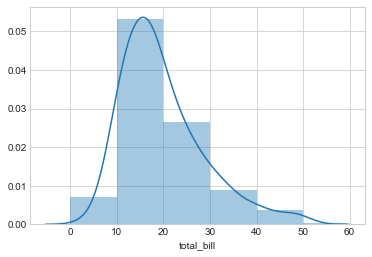

In [4]:
sns.distplot(a=tips['total_bill'].dropna(), bins=[0,10,20,30,40,50,60])

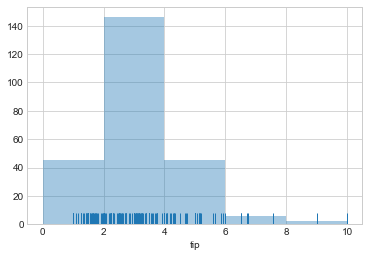

In [5]:
sns.distplot(a=tips['tip'].dropna(), bins=[0,2,4,6,8,10], kde=False, rug=True)

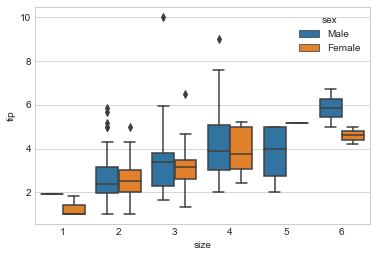

In [6]:
sns.boxplot(x='size', y='tip', hue='sex', data=tips)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [9]:
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']

In [10]:
df.describe()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [11]:
df[['ikä','palveluv', 'palkka', 'johto', 'työtov', 'työymp', 'palkkat',
   'työteht']].describe().style.format('{:.2f} ')

,ikä,palveluv,palkka,johto,työtov,työymp,palkkat,työteht
count,82.00,80.00,82.00,82.00,81.00,82.00,82.00,82.00
mean,37.95,12.18,2563.88,3.06,4.06,3.22,2.11,3.20
std,9.77,8.81,849.35,1.06,0.83,1.15,1.11,1.05
min,20.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00
25%,31.00,3.75,2027.00,2.00,4.00,3.00,1.00,3.00
50%,37.50,12.50,2320.00,3.00,4.00,3.00,2.00,3.00
75%,44.00,18.25,2808.00,4.00,5.00,4.00,3.00,4.00
max,61.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00


In [12]:
df1 = df.groupby('sukup')['palkka'].describe().T

df1.columns = sukup

df1.style.format('{:.0f}')

,Mies,Nainen
count,63,19
mean,2664,2233
std,930,341
min,1521,1715
25%,2086,1969
50%,2417,2144
75%,2925,2574
max,6278,2729


In [13]:
df2 = df.pivot_table(values='palkka', index='sukup', columns='koulutus')
df2.index = sukup
df2.columns = koulutus
df2.style.format('{:.0f}')

,Peruskoulu,2. aste,Korkeakoulu,Ylempi korkeakoulu
Mies,2354,2461,3145,5147
Nainen,2121,2211,2334,nan


In [14]:
df3 = df.pivot_table(values='palkka', index=['sukup', 'perhe'],
                     columns='koulutus')
df3.index = df3.index.set_levels(sukup, level=0)
df3.index = df3.index.set_levels(perhe, level=1)

df3.columns = koulutus

df3.style.format('{:.0f}')

In [15]:
df4 = df.pivot_table(values='palkka', index='koulutus',
                     aggfunc=[min, np.mean, np.median, max])
df4.index = koulutus
df4.columns = ['pienin', 'keskiarvo', 'mediaani', 'suurin']
df4.style.format('{:.0f}')

,pienin,keskiarvo,mediaani,suurin
Peruskoulu,1638,2310,2144,3587
2. aste,1521,2403,2378,3510
Korkeakoulu,1559,2887,2710,6278
Ylempi korkeakoulu,5069,5147,5147,5225


[Text(0, 0, 'Peruskoulu'),
 Text(0, 0, '2. aste'),
 Text(0, 0, 'Korkeakoulu'),
 Text(0, 0, 'Ylempi korkeakoulu')]

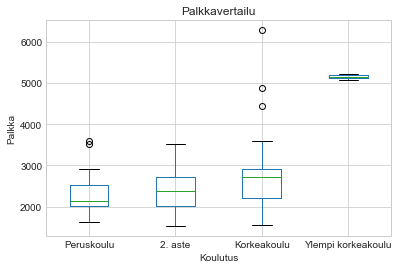

In [22]:
ax1 = df.boxplot('palkka', by='koulutus')

ax1.get_figure().suptitle('')
ax1.set_title('Palkkavertailu')
ax1.set_xlabel('Koulutus')
ax1.set_ylabel('Palkka')
ax1.set_xticklabels(koulutus)

ax1.get_figure().suptitle('')
ax1.set_title('Palkkavertailu')
ax1.set_xlabel('Koulutus')
ax1.set_ylabel('Palkka')
ax1.set_xticklabels(koulutus)

In [23]:
df[['ikä', 'palveluv', 'palkka']].corr().style.format('{:.2f}')

,ikä,palveluv,palkka
ikä,1.00,0.53,0.30
palveluv,0.53,1.00,0.24
palkka,0.30,0.24,1.00


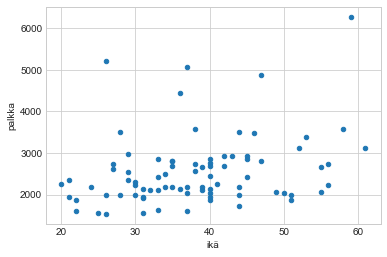

In [24]:
df.plot.scatter('ikä', 'palkka')

In [25]:
opintomenestys = pd.read_excel('http://taanila.fi/opintomenestys.xlsx')
opintomenestys.head()

,koehenkilö,verbaalinen,looginen,kielet,matematiikka,opintomenestys,sukupuoli
0,2,26,32,8.2,7,16,Nainen
1,3,29,33,9.6,5,17,Nainen
2,6,28,36,9.2,7,19,Nainen
3,7,23,34,7.2,7,14,Nainen
4,10,29,34,9.7,8,19,Nainen


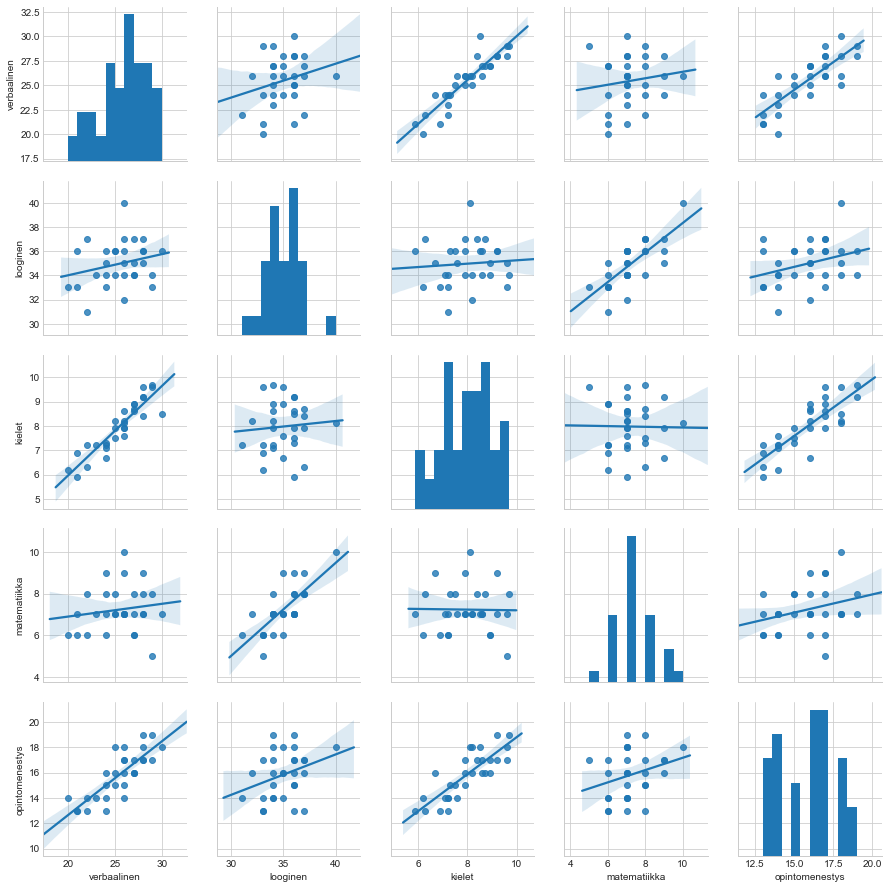

In [26]:
sns.pairplot(opintomenestys.drop('koehenkilö', axis=1), kind='reg')